In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import dateparser
from IPython.display import HTML
from IPython.display import display

In [1]:
import pandas as pd
import datetime
import dateparser
import numpy as np
import re
import copy
from IPython.display import HTML
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
flatten = lambda l: [item for sublist in l for item in sublist]

Import Data

In [2]:
#quelle: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
df  = pd.read_csv(url, error_bad_lines=False)

#remove geographic coordinates
del df['Lat']
del df['Long']

#Transpose so columns are countries
df = df.transpose()

#make multi index header
arrays = [df.iloc[1].to_numpy(),df.iloc[0].to_numpy()]
tuples = list(zip(*arrays))
header = pd.MultiIndex.from_tuples(tuples, names=['Land', 'Region'])
df.columns = header
df = df.drop(df.index[[0,1]])

#parse string date to propper date format
date = [];
for date_index in range(len(df.index)):
    date.append(dateparser.parse(df.index[date_index]))
df.index = date

#Add a column with the wordlwide cases
#important: do not execute this again/multiple times after adding the sub sums of USA and china
df['Total'] = df.sum(axis=1)

#Add a columns with the USA/China-wide cases
df['USA'] = df['US'].sum(axis=1)
df['VR China'] = df['China'].sum(axis=1)

#import population count
url = 'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population'
df_pop  = pd.read_html(url)[0]
del df_pop['Rank']
del df_pop['% of worldpopulation']
del df_pop['Date']
del df_pop['Source']
df_pop = df_pop.transpose()
df_pop.columns = df_pop.iloc[0]
df_pop = df_pop.drop(df_pop.index[[0]])
df_pop = df_pop.rename({df_pop.columns[0]: 'VR China', df_pop.columns[2]: 'USA'}, axis=1)


url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
df_tod  = pd.read_csv(url, error_bad_lines=False)

#remove geographic coordinates
del df_tod['Lat']
del df_tod['Long']

#Transpose so columns are countries
df_tod = df_tod.transpose()

#make multi index header, take old header

df_tod.columns = header
df_tod = df_tod.drop(df_tod.index[[0,1]])

#parse string date to propper date format, take old indices

df_tod.index = date

#Add a column with the wordlwide cases
#important: do not execute this again/multiple times after adding the sub sums of USA and china
df_tod['Total'] = df_tod.sum(axis=1)

#Add a columns with the USA/China-wide cases
df_tod['USA'] = df_tod['US'].sum(axis=1)
df_tod['VR China'] = df_tod['China'].sum(axis=1)

tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">show code</a>''')
display(tag)

Analyse Data

In [3]:
auswahl_länder = ['Germany','Japan','USA','VR China','Italy','Switzerland','India']
df_per_ppl = df[auswahl_länder].copy()

for index in range(len(auswahl_länder)):
    df_per_ppl.iloc[:,index] = df_per_ppl.iloc[:,index].div(df_pop[auswahl_länder[index]][0])

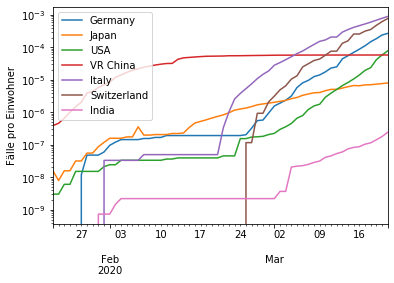

In [4]:
ax = df_per_ppl.plot(loglog=True)
ax.set_ylabel("Fälle pro Einwohner")
ax.legend(auswahl_länder);

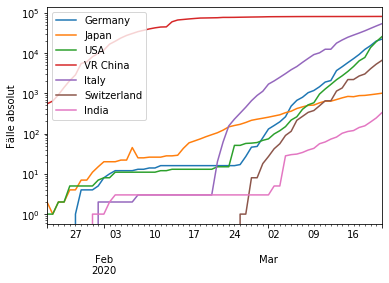

In [5]:
ax = df[auswahl_länder].plot(loglog=True)
ax.set_ylabel("Fälle absolut")
ax.legend(auswahl_länder);

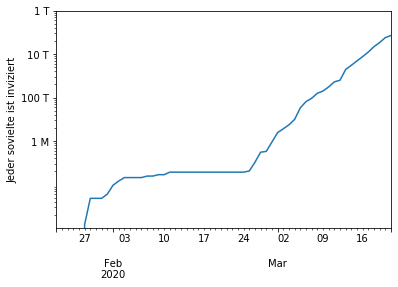

In [6]:
ax = df_per_ppl['Germany'].plot(loglog=True, legend=False)
ax.set_ylim(1/1e8,1/1000)
ax.set_yticks([1/1e6,1/1e5,1/1e4,1/1e3])
ax.set_yticklabels(['1 M','100 T','10 T','1 T'])
ax.set_ylabel("Jeder sovielte ist inviziert");

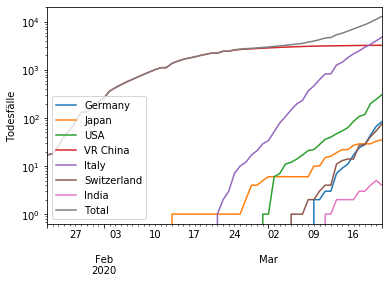

In [7]:
auswahl_länder = ['Germany','Japan','USA','VR China','Italy','Switzerland','India','Total']

ax = df_tod[auswahl_länder].plot(loglog=True)
ax.set_ylabel('Todesfälle')
ax.legend(auswahl_länder);

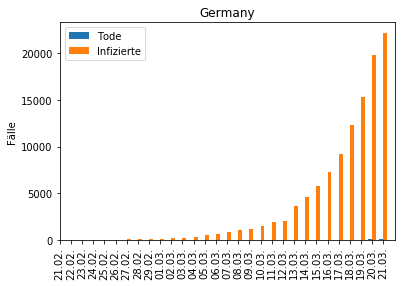

In [8]:
land = 'Germany'
start_datum_index = 30

labels = df_tod.index.strftime("%d.%m.").values.tolist()
y_1 = flatten(df_tod[land].values.tolist())
y_2 = flatten(df[land].values.tolist())

x = np.arange(len(y_1))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_1, width, label='Tode')
rects2 = ax.bar(x + width/2, y_2, width, label='Infizierte')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Fälle')
ax.set_title(land)
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xticks(rotation=90)
plt.xlim([start_datum_index,len(y_1)])
ax.legend();


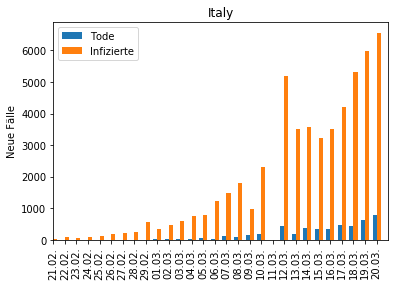

In [9]:
land = 'Italy'
start_datum_index = 30

labels = df_tod.index.strftime("%d.%m.").values.tolist()
y_1 = np.diff(flatten(df_tod[land].values.tolist()))
y_2 = np.diff(flatten(df[land].values.tolist()))

x = np.arange(len(y_1))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_1, width, label='Tode')
rects2 = ax.bar(x + width/2, y_2, width, label='Infizierte')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Neue Fälle')
ax.set_title(land)
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xticks(rotation=90)
plt.xlim([start_datum_index,len(y_1)])
ax.legend();


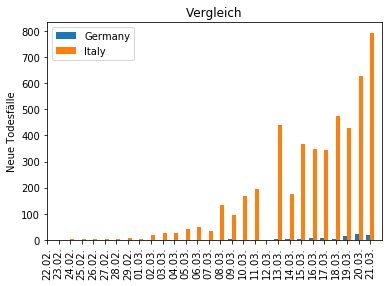

In [18]:
start_datum_index = 30

labels = df_tod.index.strftime("%d.%m.").values.tolist()
labels.pop(0) #shift one due to difference by removing 1st emelemnt
y_1 = np.diff(flatten(df_tod['Germany'].values.tolist()))
y_2 = np.diff(flatten(df_tod['Italy'].values.tolist()))

x = np.arange(len(y_1))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_1, width, label='Germany')
rects2 = ax.bar(x + width/2, y_2, width, label='Italy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Neue Todesfälle')
ax.set_title('Vergleich')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xticks(rotation=90)
plt.xlim([start_datum_index,len(y_1)])
ax.legend();


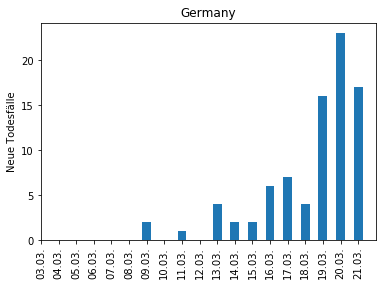

In [21]:
land = 'Germany'
start_datum_index = 40

flatten = lambda l: [item for sublist in l for item in sublist]

labels = df_tod.index.strftime("%d.%m.").values.tolist()
labels.pop(0) #shift one due to difference by removing 1st emelemnt
y_1 = np.diff(flatten(df_tod[land].values.tolist()))
x = np.arange(len(y_1))  # the label locations
width = 0.50  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, y_1, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Neue Todesfälle')
ax.set_title(land)
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xticks(rotation=90)
plt.xlim([start_datum_index,len(y_1)]);